## Load Libraries

In [1]:
install.packages('rcompanion')
install.packages('car')
install.packages('readr')

library(tidyverse)
library(IDPmisc)
library(rcompanion)
library(car)
library(readr)


The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//Rtmpe8eAU1/downloaded_packages

The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//Rtmpe8eAU1/downloaded_packages

The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//Rtmpe8eAU1/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




## Load in Data

In [2]:
avocados <- read_csv("/Users/kenyashiafernandez/Downloads/avocados.csv")

New names:
• `` -> `...1`
Rows: 18249 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Date, type, region
dbl (11): ...1, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Sm...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(avocados)

...1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany
5,11/22/2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0,conventional,2015,Albany


## Does the average price of avocados differ between Albany, Houston, and Seattle?

## Data Wrangling

In [5]:
sales = na.omit(avocados %>% filter(region %in% c("Albany", "Houston", "Seattle")))

In [6]:
sales$AveragePrice = as.numeric(sales$AveragePrice)

## Test Assumptions

### Normality

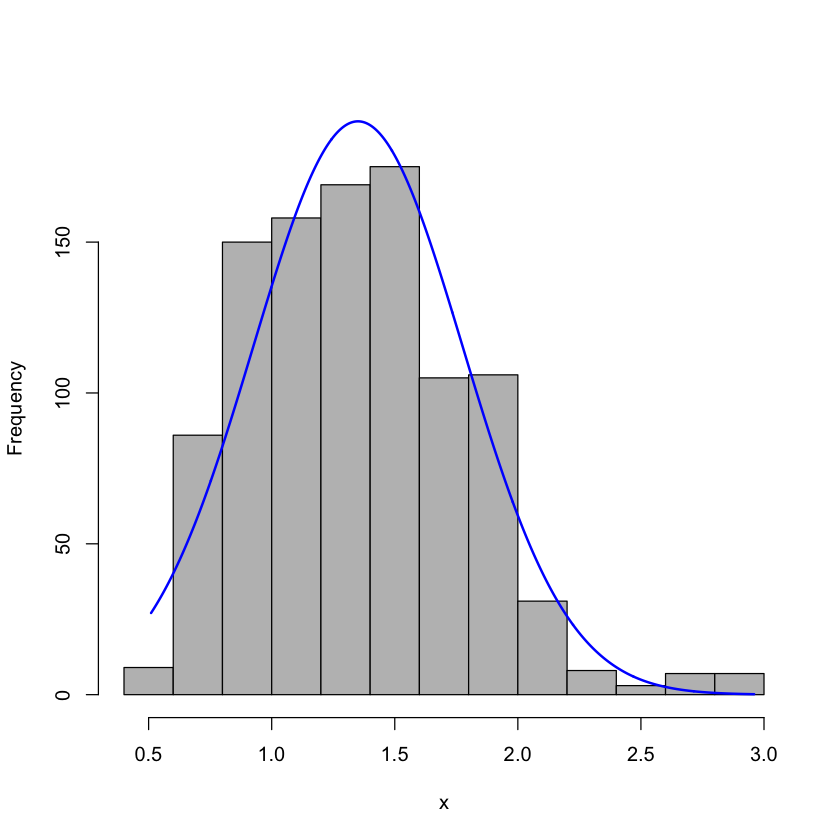

In [8]:
plotNormalHistogram(sales$AveragePrice)

### SQRT

In [9]:
sales$AveragePriceSQRT = sqrt(sales$AveragePrice)

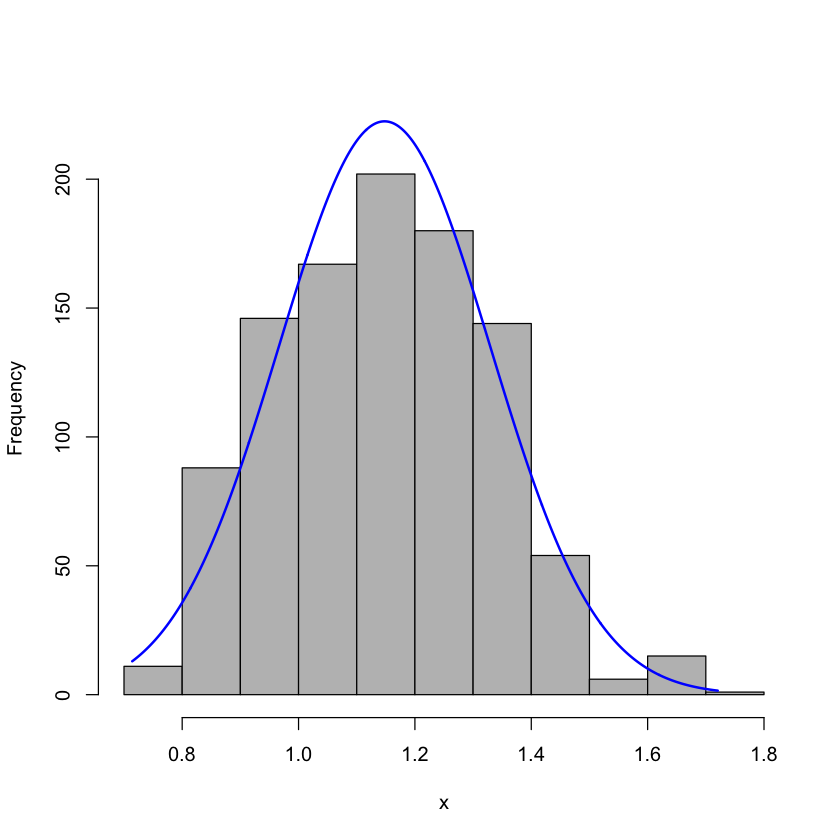

In [10]:
plotNormalHistogram(sales$AveragePriceSQRT)

In [11]:
sales$AveragePriceLOG = log(sales$AveragePrice)

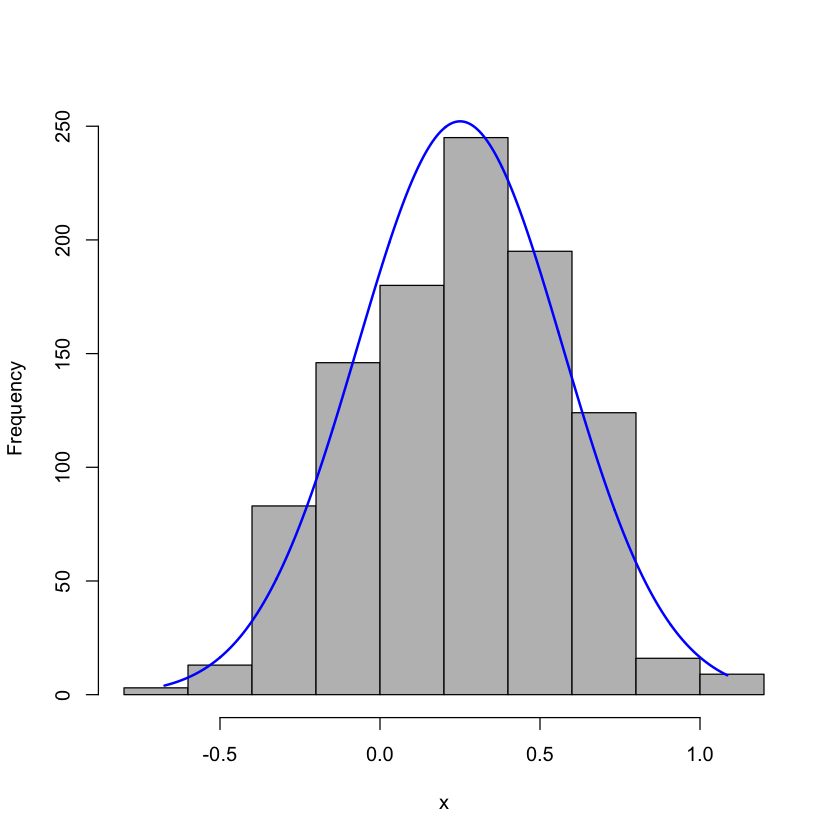

In [12]:
plotNormalHistogram(sales$AveragePriceLOG)

## Homogeneity of varience

In [13]:
bartlett.test(AveragePriceSQRT ~ region, data= sales)


	Bartlett test of homogeneity of variances

data:  AveragePriceSQRT by region
Bartlett's K-squared = 70.75, df = 2, p-value = 4.333e-16


## Anova 

In [14]:
ANOVA = lm(AveragePriceSQRT ~ region, data= sales)

In [15]:
Anova(ANOVA, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
region,2,258.8475,1.688602e-91
Residuals,1011,NA,NA


## Interpret results

In [16]:
pairwise.t.test(sales$AveragePriceSQRT, sales$region, p.adjust = "bonferroni", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  sales$AveragePriceSQRT and sales$region 

        Albany  Houston
Houston < 2e-16 -      
Seattle 8.1e-06 < 2e-16

P value adjustment method: bonferroni 

In [17]:
salesMeans = sales %>% group_by(region) %>% summarize(Mean = mean(AveragePrice))

In [18]:
salesMeans

region,Mean
<chr>,<dbl>
Albany,1.561036
Houston,1.047929
Seattle,1.442574


## The average price varies amongst all three regions. Albany has an average price of 1.56,Seattlewith 1.44, and Houston at $1.05.